<a href="https://colab.research.google.com/github/protocol-streams/research/blob/main/StabilityDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
%cd drive/MyDrive/ 

In [ ]:
%cd /content/drive/MyDrive/Grounded-Segment-Anything 
!pip install -q -r requirements.txt
%cd /content/drive/MyDrive/Grounded-Segment-Anything/GroundingDINO
!pip install -q .
%cd /content/drive/MyDrive/Grounded-Segment-Anything/segment_anything
!pip install -q .
%cd /content/drive/MyDrive/Grounded-Segment-Anything

In [ ]:
!pip list

In [5]:
import PIL
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInpaintPipeline


# def download_image(url):
#     response = requests.get(url)
#     return PIL.Image.open(BytesIO(response.content)).convert("RGB")
def download_image(url):
    #response = requests.get(url)
    return PIL.Image.open(url).convert("RGB")

#img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
#mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16
)
pipe = pipe.to(device)



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

text_encoder/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

In [36]:
img_url = "/content/drive/MyDrive/Test_Videos/paris_output/frame-0027.png"
mask_url = "/content/drive/MyDrive/Test_Videos/Mask_Images/inverted_mask.png"
init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))

  0%|          | 0/50 [00:00<?, ?it/s]

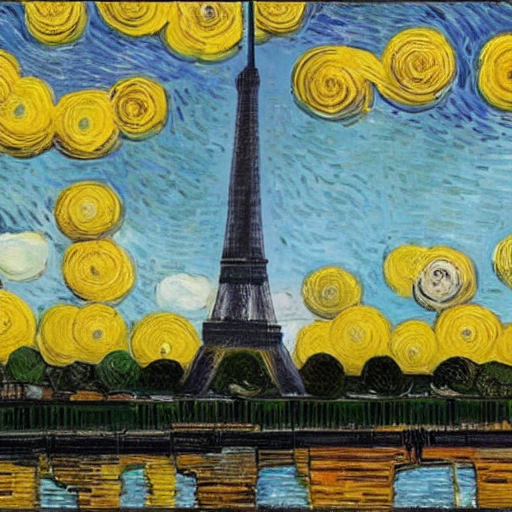

In [21]:
prompt = "a river view of the van gogh style eiffel tower in the background"
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image

In [22]:
from diffusers import StableDiffusionDepth2ImgPipeline

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
).to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


  0%|          | 0/40 [00:00<?, ?it/s]

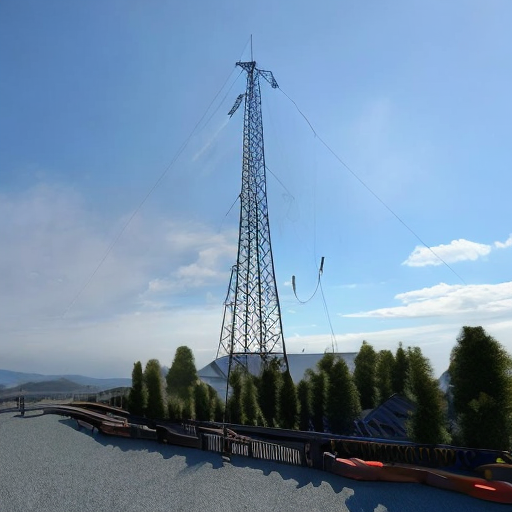

In [43]:
prompt = "mountain view"
n_prompt = "bad, deformed, ugly, bad anatomy"
image = pipe(prompt=prompt, image=init_image, negative_prompt=n_prompt, strength=0.8).images[0]
image